### Bibliotecas

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Lendo Dados

In [2]:
vars = [
    'DT',
    'NPHI',
    'RES',
    'RHOB',
]
paths = []
for v in vars:
    paths.append(os.path.join(os.getcwd(),'Outputs', f'DECOMP_{v}_FILT.pkl'))
    paths.append(os.path.join(os.getcwd(),'Outputs', f'FEATDEC_{v}_FILT.pkl'))
paths

['c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_DT_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_DT_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_NPHI_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_NPHI_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_RES_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_RES_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_RHOB_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_RHOB_FILT.pkl']

In [3]:
dfs=pd.DataFrame()
for p in paths:
    dfs = pd.concat([dfs,pd.read_pickle(p)], axis=0)
dfs

,MODEL,R2_TR,R2_TE,MAE_TR,MAE_TE,MODEL_OBJ,IN,OUT,RMSE_TR,RMSE_TE
0,SVM.MLP,0.844872,0.847915,0.065208,0.061507,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.085181,0.071883
1,SVM.PolyReg,0.843652,0.846300,0.065080,0.061619,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.085515,0.072264
2,SVM.LinReg,0.846253,0.844257,0.064814,0.062311,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.084801,0.072742
3,SVM.XGBoost,0.860108,0.843387,0.061999,0.062693,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.080890,0.072945
4,SVM.ExtraTrees,0.860460,0.842629,0.061393,0.062784,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.080788,0.073121
...,...,...,...,...,...,...,...,...,...,...
19,AdaBoostRegressor,0.889069,0.643324,0.051402,0.071803,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.059845,0.088468
20,XGBoost(DEC),0.984780,0.640055,0.016553,0.070281,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.022167,0.088872
21,AdaBoostRegressor(DEC),0.870081,0.583292,0.055865,0.080798,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.064764,0.095623
22,DecisionTree,0.960471,0.554287,0.026371,0.065496,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.035724,0.098895


In [5]:
df_results = dfs.sort_values('R2_TE', ascending=False).reset_index(drop=True)

In [6]:
def model_class(row):
    if 'DEC' in row['MODEL']:
        model_class = 'FEAT_DEC'
    elif '.' in row['MODEL']:
        model_class = 'HYBRID'
    else:
        model_class = 'BASE'
    return model_class
def base_model(row):
    if 'DEC' in row['MODEL']:
        base_model = row['MODEL'].split('(')[0]
    elif '.' in row['MODEL']:
        base_model = row['MODEL'].split('.')[0]
    else:
        base_model = row['MODEL']
    return base_model

In [7]:
df_results['CLASS'] = df_results.apply(model_class, axis=1)
df_results['BASE_MODEL'] = df_results.apply(base_model, axis=1)
df_results['BASE_MODEL'].value_counts()

BASE_MODEL
PolyReg              60
MLP                  60
SVM                  60
AdaBoostRegressor    60
ExtraTrees           60
LinReg               60
XGBoost              60
RandomForest         60
KNN                  60
DecisionTree         60
GradientBoosting     60
BaggingRegressor     60
Name: count, dtype: int64

In [8]:
df_results.columns

Index(['MODEL', 'R2_TR', 'R2_TE', 'MAE_TR', 'MAE_TE', 'MODEL_OBJ', 'IN', 'OUT',
       'RMSE_TR', 'RMSE_TE', 'CLASS', 'BASE_MODEL'],
      dtype='object')

Removendo duplicatas do caso base que ficou repetido

In [9]:
df_results['CLASS'].value_counts()

CLASS
HYBRID      576
BASE         96
FEAT_DEC     48
Name: count, dtype: int64

In [10]:
df_results = df_results.drop_duplicates(subset=['MODEL','IN', 'OUT','CLASS'])
df_results['CLASS'].value_counts()

CLASS
HYBRID      576
FEAT_DEC     48
BASE         48
Name: count, dtype: int64

Reordering columns

In [15]:
new_cols = [
    'CLASS',
    'MODEL',
    'BASE_MODEL',
    'R2_TR',
    'R2_TE',
    'RMSE_TR',
    'RMSE_TE',
    # 'MAE_TR',
    # 'MAE_TE',
    'MODEL_OBJ',
    'IN',
    'OUT',
]
df_results = df_results[new_cols]
df_results

,CLASS,MODEL,BASE_MODEL,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
1,HYBRID,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,HYBRID,SVM.MLP,SVM,0.844872,0.847915,0.085181,0.071883,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
3,HYBRID,MLP.LinReg,MLP,0.926596,0.846713,0.048681,0.057996,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,HYBRID,SVM.PolyReg,SVM,0.843652,0.846300,0.085515,0.072264,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
...,...,...,...,...,...,...,...,...,...,...
715,HYBRID,DecisionTree.DecisionTree,DecisionTree,-7.469267,-8.289256,0.629392,0.561788,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
716,HYBRID,MLP.MLP,MLP,-10.671665,-8.518276,0.551379,0.475135,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
717,HYBRID,PolyReg.PolyReg,PolyReg,-13.231549,-8.717386,0.608849,0.480079,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
718,HYBRID,PolyReg.PolyReg,PolyReg,-47.859033,-37.150219,1.511718,1.138493,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


Sumarização por classe

In [16]:
df_sum_class = df_results.drop_duplicates(subset=['CLASS', 'OUT'])
df_sum_class = df_sum_class.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True)
df_sum_class

,CLASS,MODEL,BASE_MODEL,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,HYBRID,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
4,HYBRID,GradientBoosting.MLP,GradientBoosting,0.966459,0.782489,0.029558,0.071825,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
5,BASE,PolyReg,PolyReg,0.897169,0.777609,0.051754,0.072627,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
6,FEAT_DEC,MLP(DEC),MLP,0.875294,0.838061,0.049795,0.053468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
7,HYBRID,MLP.LinReg,MLP,0.858956,0.822695,0.052957,0.055947,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
8,BASE,MLP,MLP,0.843075,0.820392,0.055858,0.056309,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
9,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


Sumarização por modelo

In [17]:
df_sum_model = df_results.drop_duplicates(subset=['BASE_MODEL', 'OUT'])
df_sum_model = df_sum_model.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True)
df_sum_model

,CLASS,MODEL,BASE_MODEL,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,HYBRID,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,BASE,ExtraTrees,ExtraTrees,0.950228,0.798039,0.040086,0.066570,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,BASE,KNN,KNN,1.000000,0.794791,0.000000,0.067103,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
5,HYBRID,XGBoost.MLP,XGBoost,0.937864,0.794570,0.044789,0.067140,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
6,HYBRID,LinReg.AdaBoostRegressor,LinReg,0.875863,0.786024,0.063306,0.068522,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
7,BASE,GradientBoosting,GradientBoosting,0.988800,0.760834,0.019015,0.072443,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
8,BASE,RandomForest,RandomForest,0.975829,0.736613,0.027935,0.076023,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
9,FEAT_DEC,BaggingRegressor(DEC),BaggingRegressor,0.993417,0.710367,0.014579,0.079721,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB


### Plotando

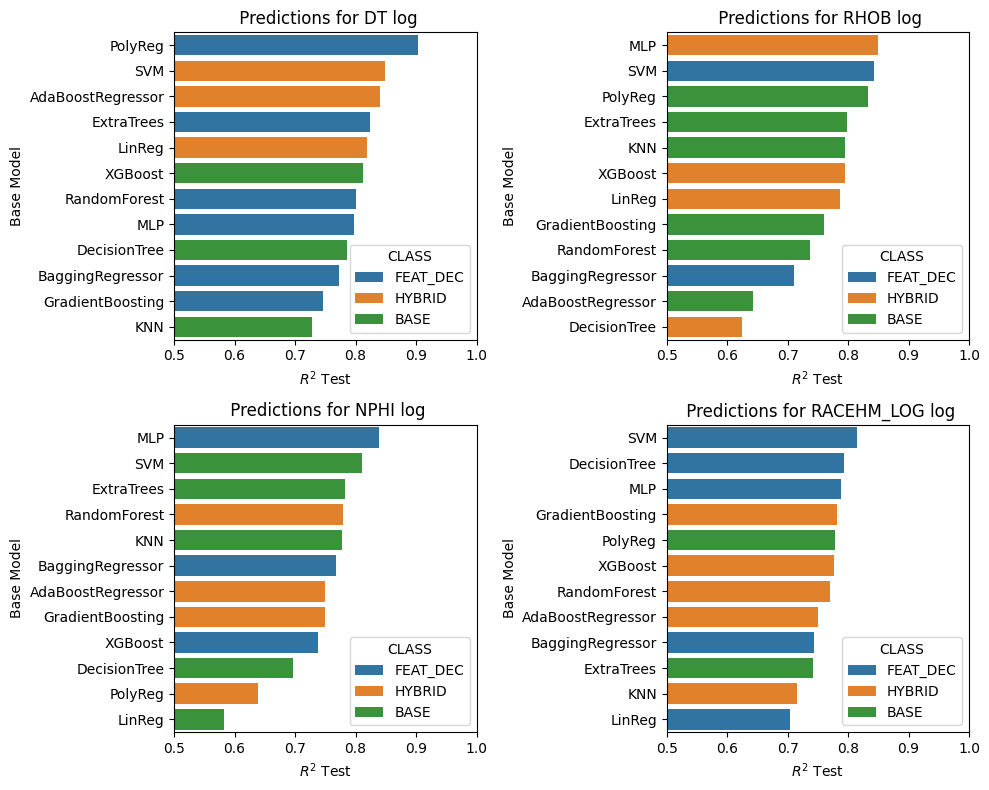

In [192]:
lim=(0.5,1)
figsize = (10,8)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

# fig.suptitle('')

for i, var in enumerate(df_results['OUT'].unique()):
    sns.barplot(data=df_sum_model[df_sum_model['OUT']==var], x='R2_TE', y='BASE_MODEL', hue='CLASS', ax=ax[i], palette='tab10', hue_order=df_results['CLASS'].unique());
    ax[i].set_title(f' Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Base Model')
    # ax[i].legend().remove()
    # if i==3: ax[i].legend()
    ax[i].set_xlim(lim)
    plt.tight_layout()

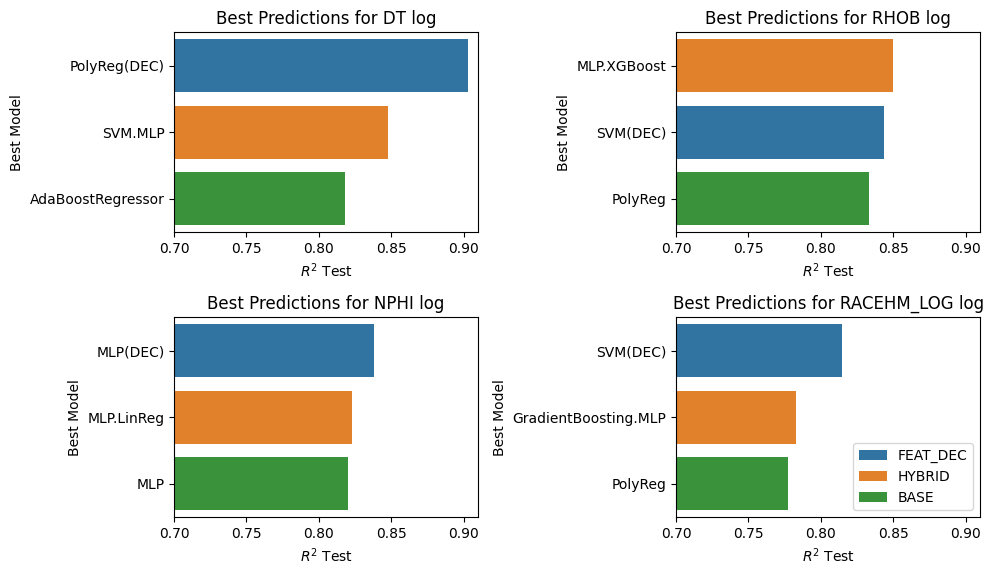

In [216]:
lim=(0.7,0.91)
figsize = (10,6)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

fig.suptitle('')

for i, var in enumerate(df_results['OUT'].unique()):
    sns.barplot(data=df_sum_class[df_sum_class['OUT']==var], x='R2_TE', y='MODEL', hue='CLASS', ax=ax[i], palette='tab10', hue_order=df_results['CLASS'].unique());
    ax[i].set_title(f'Best Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Best Model')
    ax[i].legend().remove()
    if i==3: ax[i].legend(loc='lower right')
    ax[i].set_xlim(lim)
    plt.tight_layout()